# Test Images on Model

This jupyter notebook is to test the detection of them odel for a single image.

In [1]:
import torch

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List

def display_result_no_target(image: torch.Tensor, output: List[torch.tensor], file_path='image.png') -> None:
    _, ax = plt.subplots()

    pad = 20
    image = image.numpy()[0,:].transpose(1,2,0)
    image = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='constant')
    ax.imshow(image)
    
    img_shape = 320
    if output:
        bboxes = torch.stack(output, dim=0)
        for i in range(bboxes.shape[1]):

            if bboxes[0,i,-1] >= 0:
                cx = int(bboxes[0,i,0]*img_shape - bboxes[0,i,2]*img_shape/2) + pad
                cy = int(bboxes[0,i,1]*img_shape - bboxes[0,i,3]*img_shape/2) + pad

                w = int(bboxes[0,i,2]*img_shape)
                h = int(bboxes[0,i,3]*img_shape)

                rect = patches.Rectangle((cx,cy),
                                        w, h, linewidth=2, facecolor='none', edgecolor='r')
                ax.add_patch(rect)
                ax.annotate(num_to_class(int(bboxes[0,i,5])) + " "+  f"{float(bboxes[0,i,4]):.2f}",(cx,cy), color='r')

    plt.axis('off')
    plt.savefig(file_path, bbox_inches='tight')
    plt.show()
    plt.close()

In [3]:
from tinyyolov2 import TinyYoloV2
from utils.yolo import nms, filter_boxes
from utils.viz import display_result

# make an instance with 20 classes as output
net = TinyYoloV2(num_classes=20)

# load pretrained weights
sd = torch.load("voc_pretrained.pt")
net.load_state_dict(sd)

#put network in evaluation mode
net.eval()

TinyYoloV2(
  (pad): ReflectionPad2d((0, 1, 0, 1))
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(256, 512, kernel_size=(3, 3), stride=

In [12]:
import cv2
import torch
import numpy as np
from PIL import Image
from torchvision import transforms

# Path to the image
image_path = "bird.jpg"

transform = transforms.Compose([
    transforms.Resize((320, 320)),        # Resize to 320x320
    transforms.ToTensor(),               # Convert to a PyTorch tensor (C x H x W)
])

# Load the image
image = Image.open(image_path).convert("RGB")  # Ensure the image is RGB

# Apply the transformations
input_img = transform(image).unsqueeze(0)  # Add batch dimension

tensor([], size=(0, 6))


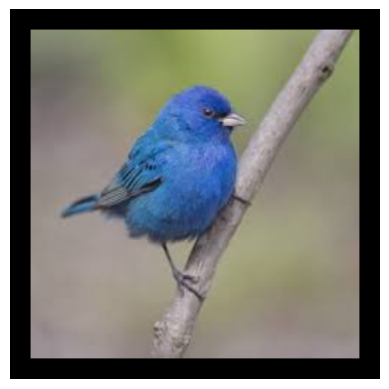

In [22]:
 #input is a 1 x 3 x 320 x 320 image
output = net(input_img)
"output is of a tensor of size 32 x 125 x 10 x 10"
#output is a 32 x 125 x 10 x 10 tensor

#filter boxes based on confidence score (class_score*confidence)
output = filter_boxes(output, 0.1)

#filter boxes based on overlap
output = nms(output, 0.25)

print(output[0].data)

display_result_no_target(input_img, output, file_path='yolo_prediction.png')